In [ ]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import shapely.geometry as sgeom
import geopandas
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 

def sample_data():
#    lons = [110, 115, 120, 122, 124 ]
    lons = [124, 122, 120, 115, 110 ]
    lats = [33, 32, 28, 30, 28 ]
    return lons, lats

f = open('D:\\text.csv', encoding = 'gbk')
my_data = pd.read_csv(f)
# x1 = [90, 100, 110, 120]
# y1 = [31, 35, 40, 20]
x1 = my_data.iloc[:,0]
y1 = my_data.iloc[:,1]
e1 = np.random.normal(0, 0.01, len(x1))
e2 = np.random.normal(0, 0.01, len(x1))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([70,140,15,50], ccrs.Geodetic())

resolution = '10m'
category = 'cultural'
name = 'admin_1_states_provinces'
name1 = 'CHN_adm3'
#CHN_adm3.shp
shpfilename = shpreader.natural_earth(resolution, category, name)
shpfilename1 = shpreader.natural_earth(resolution, category, name1)

lons, lats = sample_data()

# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

plt.title(u'China Province 受台风影响图', fontproperties=font)

# turn the lons and lats into a shapely LineString
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical
# distance)
track_buffer = track.buffer(1)

df = geopandas.read_file(shpfilename)
df = df.loc[df['admin'] == 'Taiwan']
df1 = geopandas.read_file(shpfilename1)
#df1 = df.loc[df['admin'] == 'China']

s = []
for i in range(len(df1)):
    s.append(df1.iloc[i,-1])
for i in range(len(df)):
    s.append(df.iloc[i,-1])
    
L = []
for i in range(len(x1)):
    lons_temp, lats_temp = x1[i], y1[i]
    a = sgeom.asPoint((lons_temp, lats_temp))
    L.append(a) 

for state in s:
    count = 0
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'
    for l in L:
        if state.intersects(l):
            count += my_data.iloc[i, 4]
    if count > 20:
        facecolor = 'green'
    if state.intersects(track):
        facecolor = 'red'
    elif state.intersects(track_buffer):
        facecolor = '#FF7E00'

    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                   facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none')

size = np.array(my_data.iloc[:,2]/np.max(my_data.iloc[:,2])) * 10
for i in range(len(x1)):
    #sgeom.asPoint((x1[i], y1[i]))
    plt.plot(x1[i] + e1[i], y1[i] + e2[i], color='blue', linewidth=size[i], marker='o')

# read the german borders
# poly1 = df.loc[df['admin'] == 'China']['geometry']#.values[0]
# poly2 = df.loc[df['admin'] == 'Taiwan']['geometry']#.values[0]####
# ax = plt.axes(projection=ccrs.PlateCarree())

# ax.add_geometries(poly1, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')
# ax.add_geometries(poly2, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')

# make two proxy artists to add to a legend
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = [u'省份 directly intersects\nwith track',
          'State is within \n2 degrees of track']
plt.legend([direct_hit, within_2_deg], labels,
           loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True, prop=font)
ax.figure.set_size_inches(14, 9)
plt.show()


In [ ]:
http://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html

# 载入需要的模块

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import shapely.geometry as sgeom
import geopandas
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) #设置中文字体


# 设置台风经过的路线，对路线经过的地方更改颜色（直接经过设置红色， 周围辐射地区设置为橙色）

In [2]:
def sample_data():
#    lons = [110, 115, 120, 122, 124 ]
    lons = [124, 122, 120, 115, 110 ]
    lats = [33, 32, 28, 30, 28 ]
    return lons, lats
lons, lats = sample_data()

# turn the lons and lats into a shapely LineString
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical distance)
track_buffer = track.buffer(1)

# 读取自己要在地图中展示的数据文件， 该文件第一列是经度， 第二列是纬度， 由于重复数据较多， 对经纬度增加扰动， 

In [3]:
f = open('D:\\text.csv', encoding = 'gbk')
my_data = pd.read_csv(f)
x1 = my_data.iloc[:,0]
y1 = my_data.iloc[:,1]
e1 = np.random.normal(0, 0.01, len(x1))
e2 = np.random.normal(0, 0.01, len(x1))

#size表示作图时根据自己展示的数据大小来改变地图中点的大小
size = np.array(my_data.iloc[:,2]/np.max(my_data.iloc[:,2])) * 10

In [4]:

#读取地图文件， CHN_adm3.shp， 该文件是单独下载， 是全国区县一级的边界地图文件
#但现在的地图文件中不包含台湾省的地图数据， 从另一文件中单独读取
resolution = '10m'
category = 'cultural'
#省一级的地图文件
name = 'admin_1_states_provinces'
#区县一级地图文件
name1 = 'CHN_adm3'
#国家一级地图文件
#admin_0_countries

shpfilename = shpreader.natural_earth(resolution, category, name)
shpfilename1 = shpreader.natural_earth(resolution, category, name1)

df = geopandas.read_file(shpfilename)
#‘admin’这一列存取的是国家名称，这是一个大BUG，竟然将台湾作为一个国家出现。
#为了展示的全面，该代码只是为了将 台湾省画到中国版图上
df = df.loc[df['admin'] == 'Taiwan']
df1 = geopandas.read_file(shpfilename1)
#df1 = df.loc[df['admin'] == 'China']

In [5]:
#s中保存的是各个全国区县的地图边界信息，s中每一项代表着一个县或一个区
s = []
for i in range(len(df1)):
    s.append(df1.iloc[i,-1])
for i in range(len(df)):
    s.append(df.iloc[i,-1])

#L中保存的是自己展示文件中的经纬度，每对经纬度整合为一个地图中的一个点    
L = []
for i in range(len(x1)):
    lons_temp, lats_temp = x1[i], y1[i]
    a = sgeom.asPoint((lons_temp, lats_temp))
    L.append(a) 

In [ ]:
# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
# ax.background_patch.set_visible(False)
# ax.outline_patch.set_visible(False)



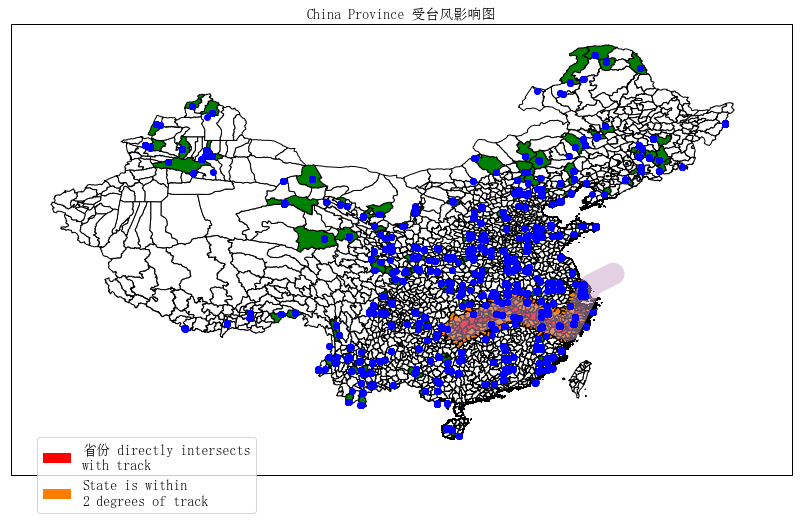

In [6]:
#画地图
#设置作图
ax = plt.axes(projection=ccrs.PlateCarree()) 
#设置作图区域
ax.set_extent([70,140,15,50], ccrs.Geodetic())
for state in s:
    count = 0    #count计算state这个区域内根据经纬度记录的数据点的个数
    facecolor = 'white'#[0.9375, 0.9375, 0.859375]
    edgecolor = 'black'
    for l in L:
        if state.intersects(l):    #state.intersects(l)该函数返回bool值，表示数据点l(经纬度)是否在state这个区域中
            count += my_data.iloc[i, 4]
    if count > 10:
        facecolor = 'green'
    if state.intersects(track):
        facecolor = 'red'
    elif state.intersects(track_buffer):
        facecolor = '#FF7E00'

    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)


ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                   facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none')

#添加坐标点
for i in range(len(x1)):
    plt.plot(x1[i] + e1[i], y1[i] + e2[i], color='blue', linewidth=size[i], marker='o')

#添加标题
plt.title(u'China Province 受台风影响图', fontproperties=font)

# make two proxy artists to add to a legend
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = [u'省份 directly intersects\nwith track',
          'State is within \n2 degrees of track']
plt.legend([direct_hit, within_2_deg], labels,
           loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True, prop=font)
ax.figure.set_size_inches(14, 9)
plt.show()

# 调用百度api实现热力图

In [48]:
import json
from urllib.request import urlopen, quote
import requests,csv
import pandas as pd #导入这些库后边都要用到

def getlnglat(address):
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'qR7Pdg3kn7pjgTR4VWt1luoj8X0QVeDb'
    add = quote(address) #由于本文城市变量为中文，为防止乱码，先用quote进行编码
    uri = url + '?' + 'address=' + add  + '&output=' + output + '&ak=' + ak
    req = urlopen(uri)
    res = req.read().decode() #将其他编码的字符串解码成unicode
    temp = json.loads(res) #对json数据进行解析
    return temp

file = open(r'D:\My_python_Data\Map\BaiduMap_API\point1.json','w') #建立json数据文件
with open(r'D:\My_python_Data\Map\BaiduMap_API\City_price.csv', 'r', encoding='gbk') as csvfile: #打开csv
    reader = csv.reader(csvfile)
    for line in reader: #读取csv里的数据
        # 忽略第一行
        if reader.line_num == 1: #由于第一行为变量名称，故忽略掉
            continue
            # line是个list，取得所有需要的值
        b = line[0].strip() #将第一列city读取出来并清除不需要字符
        c= line[1].strip()#将第二列price读取出来并清除不需要字符
        lng = getlnglat(b)['result']['location']['lng'] #采用构造的函数来获取经度
        lat = getlnglat(b)['result']['location']['lat'] #获取纬度
        str_temp = '{"lat":' + str(lat) + ',"lng":' + str(lng) + ',"count":' + str(c) +'},'
        #print(str_temp) #也可以通过打印出来，把数据copy到百度热力地图api的相应位置上
        file.write(str_temp) #写入文档
file.close() #保存

In [49]:
data = [{"lat":39.92998577808024,"lng":116.39564503787867,"count":124},{"lat":39.143929903310074,"lng":117.21081309155257,"count":123},{"lat":38.048958314615454,"lng":114.52208184420766,"count":118},{"lat":37.89027705396754,"lng":112.5508635890553,"count":103},{"lat":40.828318873081585,"lng":111.6603505200542,"count":101},{"lat":41.808644783515746,"lng":123.43279092160505,"count":103.2},{"lat":38.94870993830429,"lng":121.59347778143518,"count":102.5},{"lat":43.89833760709784,"lng":125.31364242720072,"count":104.3},{"lat":45.7732246332393,"lng":126.65771685544611,"count":102.1},{"lat":31.24916171001514,"lng":121.48789948569473,"count":123.8},{"lat":32.05723550180587,"lng":118.77807440802562,"count":135.4},{"lat":30.259244461536102,"lng":120.2193754157201,"count":127.4},{"lat":29.885258965918055,"lng":121.57900597258933,"count":111.1},{"lat":34.69611652432266,"lng":115.17841405829013,"count":30},{"lat":34.43858864024636,"lng":115.64188568785016,"count":34},{"lat":35.26244049607468,"lng":115.46335977452752,"count":45},{"lat":22.546053546205247,"lng":114.0259736573215,"count":56}]
len(data)

17

In [50]:
f = open(r'D:\My_python_Data\Map\BaiduMap_API\City_price.csv', 'r', encoding='gbk')
my_data = pd.read_csv(f)

In [57]:
data[1]['lat']
for i in range(len(my_data)):
    my_data.iloc[i, 2] = data[i]['lng']
    my_data.iloc[i, 3] = data[i]['lat']

In [2]:
import json  
from urllib.request import urlopen, quote  
  
  
url = 'http://api.map.baidu.com/geocoder/v2/'  
output = 'json'  
ak = '**vGLiKFk4Csd4AmaEWBI7a3wFlBdNff '  
a=['北京','天津','石家庄','太原','呼和浩特','沈阳','大连','长春','哈尔滨','上海','南京','杭州','宁波','合肥','福州','厦门','南昌','济南','青岛','郑州','武汉','长沙','广州','深圳','南宁','海口','重庆','成都','贵阳','昆明','拉萨','西安','兰州','西宁','银川','乌鲁木齐']  
for i in a:  
     add = quote(i)  
     uri = url + '?' + 'address=' + add  + '&output=' + output + '&ak=' + ak #百度地理编码API  
     req = urlopen(uri)  
     res = req.read().decode()  
     temp = json.loads(res)  
     print(temp['result']['location']['lng'],temp['result']['location']['lat'])#打印出经纬度  




In [32]:
#主要参考了这两篇博客内容
https://blog.csdn.net/guang_mang/article/details/71237961
https://www.jianshu.com/p/773ff5f08a2c  

In [22]:
#读取自己的数据， 并将数据转换为百度API要求的格式
import pandas as pd
f = open(r'D:\项目\南京项目汇总\Data\四鸟+中华蟾蜍作图数据+图\baitoubei\baitoubei.csv', encoding='gbk')
my_data = pd.read_csv(f)

#列表L中存放的是根据API代码要求的字典，共三项：经度， 纬度， 热力图要展示的数据
L = []
for i in range(len(my_data)):
    temp = {"lng" : my_data.iloc[i, 3], "lat": my_data.iloc[i, 4], "count":my_data.iloc[i, 2]*100}
    L.append(temp)

In [28]:
#作图步骤
#百度地图API网址
http://developer.baidu.com/map/jsdemo.htm#c1_15
    
#百度API应用网页
http://lbsyun.baidu.com/apiconsole/key
    
密匙：cGoscMOBKHDoTNAMvAkukYQvmyyI9ggS

var points =[{"lng":116.418261,"lat":39.921984,"count":50}]按此格式将[]里面内容替换成自己的数据

注意更改最大值
heatmapOverlay.setDataSet({data:points,max:100});
	//是否显示热力图
    
在代码开头部分将高度更改height:500px,500px换成660px, 刚好适应窗口大小
<title>热力图功能示例</title>
    <style type="text/css">
		ul,li{list-style: none;margin:0;padding:0;float:left;}
		html{height:100%}
		body{height:100%;margin:0px;padding:0px;font-family:"微软雅黑";}
		#container{height:500px;width:100%;}
		#r-result{width:100%;}
    

In [38]:
count = []
for i in range(len(L)):
    count.append(L[i]['count'])

In [24]:
L_new = []
for x in L :
    if x not in L_wrong:
        L_new.append(x)

In [23]:
L[0]['lat']
L_wrong = []
for i in range(len(L)):
    if L[i]['lat'] > 43.82 and L[i]['lng'] > 91 and L[i]['lng'] < 116:
        L_wrong.append(L[i])

# 百度地图API添加多个行政区域

In [ ]:
 #https://blog.csdn.net/kuankuanerfei/article/details/50910742
[javascript] view plain copy
<!DOCTYPE html>  
<html>  
<head>  
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />  
    <meta name="viewport" content="initial-scale=1.0, user-scalable=no" />  
    <style type="text/css">  
        body, html,#allmap {width: 100%;height: 100%;overflow: hidden;margin:0;font-family:"微软雅黑";}  
    </style>  
    <script type="text/javascript" src="http://api.map.baidu.com/api?v=2.0&ak=您的密钥"></script> 
    <title>添加行政区划</title>  
</head>  
<body>  
    <div id="allmap"></div>  
</body>  
</html>  
<script type="text/javascript">  
    // 百度地图API功能  
    var map = new BMap.Map("allmap");  
    map.centerAndZoom(new BMap.Point(113.363765, 23.134850), 10);  
    map.enableScrollWheelZoom();  
  map.setMapStyle({  
  styleJson:[  
          {  
                    "featureType": "background",  
                    "elementType": "all",  
                    "stylers": {  
                              "color": "#212121"  
                    }  
          },  
          {  
                    "featureType": "road",  
                    "elementType": "all",  
                    "stylers": {  
                              //"color": "#212121"  
                               "visibility": "off"  
                    }  
          },  
          {  
                    "featureType": "label",  
                    "elementType": "all",  
                    "stylers": {  
                              "color": "#212121"  
                               //"visibility": "off"  
                    }  
          },  
          {  
                    "featureType": "boundary",  
                    "elementType": "all",  
                    "stylers": {  
                              "color": "#ffffff"  
                    }  
          },  
          {  
                    "featureType": "poi",  
                    "elementType": "all",  
                    "stylers": {  
                              //"color": "#ffffff"  
                              "visibility": "off"  
                    }  
          }  
]  
});  
  cityJSONZ=[{"name":"天河区","color": "#9F79EE"},  
             {"name":"白云区","color": "#9F79EE"},  
             {"name":"越秀区","color": "#9F79EE"},  
             {"name":"黄埔区","color": "#9F79EE"},  
             {"name":"萝岗区","color": "#9F79EE"},  
             {"name":"从化市","color": "#9F79EE"},  
             {"name":"增城市","color": "#9F79EE"},  
             {"name":"番禺区","color": "#9F79EE"},  
            {"name":"花都区","color": "#9F79EE"},  
            {"name":"南沙区","color": "#9F79EE"},  
             {"name":"海珠区","color": "#9F79EE"}];  
var city = new Array();  
for(var i=0;i<cityJSONZ.length;i++){  
var cityJSON={};  
cityJSON.name=cityJSONZ[i].name;  
  cityJSON.color=cityJSONZ[i].color;  
city.push(cityJSON);  
}  
for(var i=0;i<city.length;i++){  
    getBoundary(city[i]);  
}   
  
    function getBoundary(city){      
      var jsonObj = city ; //使用eval解析成对象  
      var bdary = new BMap.Boundary();  
    bdary.get(jsonObj.name, function(rs){      //获取行政区域  
            //map.clearOverlays();        //清除地图覆盖物         
            var count = rs.boundaries.length; //行政区域的点有多少个  
            if (count === 0) {  
                alert('未能获取当前输入行政区域');  
                return ;  
            }  
            var pointArray = [];  
            for (var i = 0; i < count; i++) {  
                var ply = new BMap.Polygon(rs.boundaries[i], {strokeWeight: 2, strokeColor: "#ffffff"}); //建立多边形覆盖物  
                map.addOverlay(ply);  //添加覆盖物  
                //pointArray = pointArray.concat(ply.getPath());  
            }      
            //map.setViewport(pointArray);    //调整视野                   
        });     
    }  
  
var tianhe=new BMap.Point (113.367062,23.130754),  
yuexiu=new BMap.Point (113.273638,23.135805);  
var marker=new BMap.Marker(tianhe, {  
  // 指定Marker的icon属性为Symbol  
  icon: new BMap.Symbol(BMap_Symbol_SHAPE_POINT, {  
    scale: 1.5,//图标缩放大小  
    fillColor: "red",//填充颜色  
    fillOpacity: 1//填充透明度  
  })  
});  
map.addOverlay(marker);  
  
marker.setAnimation(BMAP_ANIMATION_BOUNCE);  
  
var point1=[tianhe,yuexiu];  
var curve1 = new BMapLib.CurveLine(point1, {strokeColor:"yellow",strokeWeight:10, strokeOpacity:0.8});  
map.addOverlay(curve1);  
    curve.enableEditing(); //开启编辑功能  
  
      
</script>  